# **Zadanie 3.** (Travelling Salesman Problem)

[M. Groetschel, M. Padberg: "The Optimized Odyssey", AIRONews VI, n.2 Summer 2001](https://www.zib.de/groetschel/pubnew/paper/groetschelpadberg2001a.pdf)

## Dane

Pierwsze zagadnienie, to skąd wziąć dane do testów i w jakim będą one formacie. Wykorzystamy dane ze strony [National Travelling Salesman Problems](http://www.math.uwaterloo.ca/tsp/world/countries.html), konkretnie najmniejszy z nich - Saharę Zachodnią.

Format danych:


In [39]:
cities = """
1 20833.3333 17100.0000
2 20900.0000 17066.6667
3 21300.0000 13016.6667
4 21600.0000 14150.0000
5 21600.0000 14966.6667
6 21600.0000 16500.0000
7 22183.3333 13133.3333
8 22583.3333 14300.0000
9 22683.3333 12716.6667
10 23616.6667 15866.6667
11 23700.0000 15933.3333
12 23883.3333 14533.3333
13 24166.6667 13250.0000
14 25149.1667 12365.8333
15 26133.3333 14500.0000
16 26150.0000 10550.0000
17 26283.3333 12766.6667
18 26433.3333 13433.3333
19 26550.0000 13850.0000
20 26733.3333 11683.3333
21 27026.1111 13051.9444
22 27096.1111 13415.8333
23 27153.6111 13203.3333
24 27166.6667 9833.3333
25 27233.3333 10450.0000
26 27233.3333 11783.3333
27 27266.6667 10383.3333
28 27433.3333 12400.0000
29 27462.5000 12992.2222
"""

Są to współrzędne euklidesowe 29 miast Sahary Zachodniej. Naszym zadaniem jest znalezienie najkrótszego cyklu Hamiltona przechodzącego przez te miasta.

## Konwersja danych - tworzymy listę punktów.

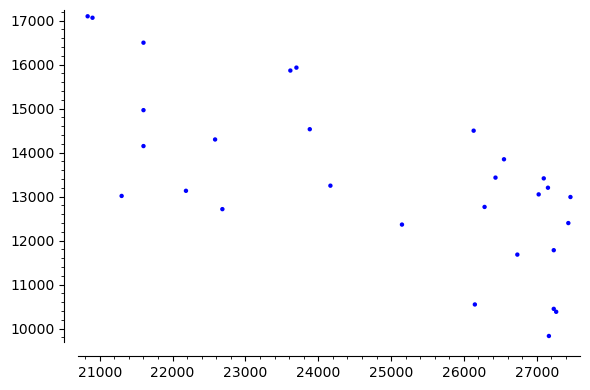

In [40]:
def grouped(iterable, n):
    "s -> (s0,s1,s2,...sn-1), (sn,sn+1,sn+2,...s2n-1), (s2n,s2n+1,s2n+2,...s3n-1), ..."
    return zip(*[iter(iterable)]*n)

coords = []
for t in grouped(map(float, cities.split()),3):
    coords.append((t[1], t[2]))

list_plot(coords)

## Problem liniowy - zmienne odpowiadające krawędziom grafu


In [41]:
# Funkcja pomocnicza - odległość pomiędzy miastami

from scipy.spatial import distance

# Generujemy problem liniowy

p = MixedIntegerLinearProgram(maximization=False)
e = p.new_variable(binary=True)

p.set_objective(sum(distance.euclidean(a,b) * e[a, b] for a in coords for b in coords if a != b))

## Warunki


In [42]:
# z każdego wierzchołka wychodzi dokładnie jedna krawędź
for a in coords:
    p.add_constraint(sum(e[a,b] for b in coords if b != a) == 1)

# do każdego wierzchołka wchodzi dokładnie jedna krawędź
for b in coords:
    p.add_constraint(sum(e[a,b] for a in coords if a != b) == 1)

## Prezentacja rozwiązania


Wartość funkcji celu 20579.847652717897


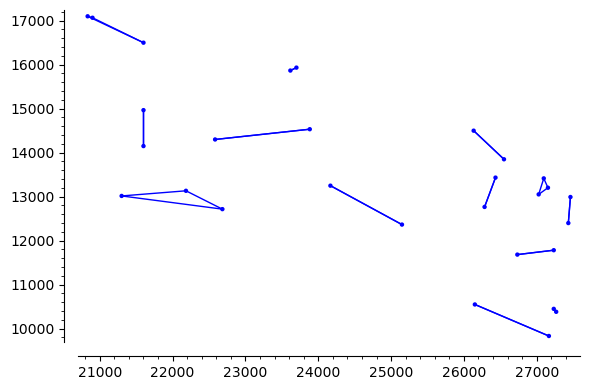

In [43]:
print("Wartość funkcji celu", p.solve())

v = list_plot(coords)
for edge in [ (a,b) for a in coords for b in coords if a != b and p.get_values(e[a,b]) == 1]:
    v = v + line(edge)
plot(v)

Coś się nie zgadza. Co?

**Dopisz brakujący warunek.**

**Uwaga.** Problem po dopisaniu brakującego warunku robi się zbyt duży, by rozwiązywać go w Sage Math Cell. Lepiej zmniejszyć liczbę miast, np. do dwunastu jak w przykładzie z wykładu. Optymizm prezentowany na wykładzie (że mamy świetną metodę rozwiązywania problemu komiwojażera) nie jest jeszcze uzasadniony: potrzebne są jeszcze **cięcia Gomory'ego**.
